In [49]:
pip install imbalanced-learn

                                              0.0/258.0 kB ? eta -:--:--
     ---------                               61.4/258.0 kB 1.6 MB/s eta 0:00:01
     ------------------------------         204.8/258.0 kB 3.1 MB/s eta 0:00:01
     ------------------------------------   245.8/258.0 kB 3.0 MB/s eta 0:00:01
     -------------------------------------  256.0/258.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 258.0/258.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from deap import base, creator, tools, algorithms
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score, roc_curve, roc_auc_score

In [64]:
df_1 = pd.read_csv('data/static_train.csv')
df_1.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,ckd,cld,copd,diabetes,hypertension,ihd,stroke,los_icu_binned_1 to 2 days,los_icu_binned_2 to 4 days,los_icu_binned_4+ days
0,29179088,4/10/80 23:21,4/17/80 14:00,4/12/80 17:41,4/16/80 13:38,3.83,0,1,WHITE,72.276455,...,1,0,1,0,1,1,0,0.0,1.0,0.0
1,27139242,4/25/33 5:47,5/13/33 7:15,4/25/33 6:37,4/27/33 16:01,2.39,0,1,BLACK/AFRICAN AMERICAN,73.312782,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,25918892,10/27/43 15:06,10/31/43 14:21,10/27/43 15:06,10/30/43 12:11,2.88,0,1,WHITE,91.820358,...,0,0,0,0,1,1,1,0.0,1.0,0.0
3,20778724,10/4/67 7:15,10/19/67 17:45,10/5/67 9:23,10/6/67 21:43,1.51,0,1,ASIAN - CHINESE,63.756003,...,1,0,0,0,1,0,1,1.0,0.0,0.0
4,21999692,2/20/77 21:08,3/6/77 16:40,2/22/77 16:35,2/25/77 17:54,3.05,0,1,BLACK/AFRICAN AMERICAN,55.139306,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [65]:
df_2 = pd.read_csv('data/static_val.csv')
df_2.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,ckd,cld,copd,diabetes,hypertension,ihd,stroke,los_icu_binned_1 to 2 days,los_icu_binned_2 to 4 days,los_icu_binned_4+ days
0,23169158,3/12/27 1:19,3/19/27 13:15,3/12/27 2:43,3/15/27 1:53,2.97,0,0,WHITE,84.191979,...,1,0,0,1,1,0,0,0.0,1.0,0.0
1,27780902,9/28/53 21:02,9/30/53 19:17,9/28/53 22:29,9/30/53 21:16,1.95,1,1,WHITE,47.741635,...,1,0,1,0,1,0,0,1.0,0.0,0.0
2,22758367,5/30/70 21:36,6/6/70 17:50,5/31/70 10:38,6/2/70 16:22,2.24,0,0,OTHER,35.410413,...,0,0,0,0,1,0,0,0.0,1.0,0.0
3,22987108,6/10/46 16:37,7/12/46 0:00,6/22/46 11:46,7/13/46 0:27,20.53,1,1,WHITE,69.439961,...,1,0,0,0,1,1,0,0.0,0.0,1.0
4,23676183,7/8/39 21:28,7/29/39 16:30,7/9/39 23:42,7/11/39 17:04,1.72,0,0,WHITE,46.517176,...,1,1,0,0,0,0,0,1.0,0.0,0.0


In [66]:
df_3 = pd.read_csv('data/static_test.csv')
df_3.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,ckd,cld,copd,diabetes,hypertension,ihd,stroke,los_icu_binned_1 to 2 days,los_icu_binned_2 to 4 days,los_icu_binned_4+ days
0,26572167,6/23/39 15:06,6/27/39 22:00,6/25/39 9:37,6/27/39 18:18,2.36,0,1,HISPANIC/LATINO - CENTRAL AMERICAN,52.475381,...,0,1,1,1,1,1,0,0.0,1.0,0.0
1,21909820,1/1/38 20:37,1/4/38 0:00,1/1/38 21:58,1/4/38 1:20,2.14,1,0,UNKNOWN,73.002352,...,0,0,1,0,1,0,0,0.0,1.0,0.0
2,20149713,7/11/78 5:58,7/25/78 19:00,7/11/78 6:28,7/12/78 16:28,1.42,0,0,UNKNOWN,77.523622,...,1,0,0,0,1,1,0,1.0,0.0,0.0
3,20464943,5/31/85 6:55,6/5/85 1:34,5/31/85 6:56,6/5/85 4:04,4.88,1,1,WHITE,64.411476,...,0,0,1,0,1,0,0,0.0,0.0,1.0
4,21585180,2/22/44 16:25,2/27/44 18:53,2/22/44 17:20,2/25/44 16:37,2.97,0,1,BLACK/AFRICAN AMERICAN,44.142919,...,1,0,1,1,0,0,0,0.0,1.0,0.0


In [67]:
df_train = pd.concat([df_1, df_3])

In [68]:
df_train.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,ckd,cld,copd,diabetes,hypertension,ihd,stroke,los_icu_binned_1 to 2 days,los_icu_binned_2 to 4 days,los_icu_binned_4+ days
0,29179088,4/10/80 23:21,4/17/80 14:00,4/12/80 17:41,4/16/80 13:38,3.83,0,1,WHITE,72.276455,...,1,0,1,0,1,1,0,0.0,1.0,0.0
1,27139242,4/25/33 5:47,5/13/33 7:15,4/25/33 6:37,4/27/33 16:01,2.39,0,1,BLACK/AFRICAN AMERICAN,73.312782,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,25918892,10/27/43 15:06,10/31/43 14:21,10/27/43 15:06,10/30/43 12:11,2.88,0,1,WHITE,91.820358,...,0,0,0,0,1,1,1,0.0,1.0,0.0
3,20778724,10/4/67 7:15,10/19/67 17:45,10/5/67 9:23,10/6/67 21:43,1.51,0,1,ASIAN - CHINESE,63.756003,...,1,0,0,0,1,0,1,1.0,0.0,0.0
4,21999692,2/20/77 21:08,3/6/77 16:40,2/22/77 16:35,2/25/77 17:54,3.05,0,1,BLACK/AFRICAN AMERICAN,55.139306,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [78]:
# 新建一个空的 los_icu_3 列
df_train['binned'] = None

# 根据条件设置 los_icu_3 列的值
df_train.loc[df_train['los_icu_binned_1 to 2 days'] == 1, 'binned'] = '1 to 2 days'
df_train.loc[df_train['los_icu_binned_2 to 4 days'] == 1, 'binned'] = '2 to 4 days'
df_train.loc[df_train['los_icu_binned_4+ days'] == 1, 'binned'] = '4+ days'

# 新建一个空的 los_icu_3 列
df_3['binned'] = None

# 根据条件设置 los_icu_3 列的值
df_2.loc[df_2['los_icu_binned_1 to 2 days'] == 1, 'binned'] = '1 to 2 days'
df_2.loc[df_2['los_icu_binned_2 to 4 days'] == 1, 'binned'] = '2 to 4 days'
df_2.loc[df_2['los_icu_binned_4+ days'] == 1, 'binned'] = '4+ days'

In [80]:
df_test = pd.get_dummies(df_2, columns=['race', 'gender', 'admission_type', 'first_careunit'])

In [79]:
df_encoded = pd.get_dummies(df_train, columns=['race', 'gender', 'admission_type', 'first_careunit'])

# 显示编码后的 DataFrame
df_encoded.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,admission_age,weight_admit,charlson_score,...,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU)
0,29179088,4/10/80 23:21,4/17/80 14:00,4/12/80 17:41,4/16/80 13:38,3.83,0,72.276455,78.8,5,...,0,0,0,0,1,0,0,0,0,0
1,27139242,4/25/33 5:47,5/13/33 7:15,4/25/33 6:37,4/27/33 16:01,2.39,0,73.312782,60.9,9,...,0,0,0,0,0,0,0,0,0,1
2,25918892,10/27/43 15:06,10/31/43 14:21,10/27/43 15:06,10/30/43 12:11,2.88,0,91.820358,74.0,6,...,1,0,0,1,0,0,0,0,0,0
3,20778724,10/4/67 7:15,10/19/67 17:45,10/5/67 9:23,10/6/67 21:43,1.51,0,63.756003,71.0,9,...,0,1,0,0,0,0,0,0,0,0
4,21999692,2/20/77 21:08,3/6/77 16:40,2/22/77 16:35,2/25/77 17:54,3.05,0,55.139306,52.0,11,...,1,0,0,1,0,0,0,0,0,0


In [81]:
columns_to_drop = ['id','hosp_admittime','hosp_dischtime','icu_intime','icu_outtime','los_icu','los_icu_binned_1 to 2 days', 'los_icu_binned_2 to 4 days',
       'los_icu_binned_4+ days']
df = df_encoded.drop(columns=columns_to_drop)
df.head()

,icu_death,admission_age,weight_admit,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,...,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU)
0,0,72.276455,78.8,5,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,73.312782,60.9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,91.820358,74.0,6,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,63.756003,71.0,9,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,55.139306,52.0,11,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [82]:
# Genetic Algorithm
df_sampled = df.sample(n=3000, random_state=42)

# Creating feature matrix X and target variable y
X = df_sampled.drop(columns=['binned'])
y = df_sampled['binned'].copy()

# Defining the fitness function
def evaluate(individual, X, y):
    selected_features_0 = [bool(i) for i in individual]
    X_selected = X.iloc[:, selected_features_0]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred),

# Defining genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.choice, [0, 1])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, X=X, y=y)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Adjusting genetic algorithm parameters
population_size = 100
num_generations = 30  # Increasing the number of generations
cxpb = 0.3  # Reducing crossover probability
mutpb = 0.4  # Increasing mutation probability

# Creating the population
population = toolbox.population(n=population_size)
# Running the genetic algorithm
for generation in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=cxpb, mutpb=mutpb)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Getting the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = [bool(i) for i in best_individual]
selected_features_names = X.columns[selected_features]
print("Selected features_2:", selected_features_names)

D:\Python\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\Python\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Selected features_2: Index(['icu_death', 'ckd', 'diabetes', 'race_AMERICAN INDIAN/ALASKA NATIVE',
       'race_ASIAN - ASIAN INDIAN', 'race_ASIAN - CHINESE',
       'race_ASIAN - KOREAN', 'race_ASIAN - SOUTH EAST ASIAN',
       'race_BLACK/AFRICAN', 'race_HISPANIC OR LATINO',
       'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - CUBAN', 'race_HISPANIC/LATINO - DOMINICAN',
       'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
       'race_PORTUGUESE', 'race_SOUTH AMERICAN', 'race_WHITE - BRAZILIAN',
       'race_WHITE - EASTERN EUROPEAN', 'race_WHITE - OTHER EUROPEAN',
       'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION',
       'admission_type_EW EMER.', 'admission_type_URGENT',
       'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
       'first_careunit_Medical Intensive Care Unit 

In [85]:
# 从 df_train 中提取特征和目标变量
X_train = df[selected_features_names]
y_train = df['binned']

# 从 df_3 中提取特征和目标变量
X_test = df_test[selected_features_names]
y_test = df_test['binned']

训练准确率: 0.3804796286745745
              precision    recall  f1-score   support

 1 to 2 days       0.32      0.51      0.39      2155
 2 to 4 days       0.39      0.30      0.34      2632
     4+ days       0.46      0.36      0.40      2969

    accuracy                           0.38      7756
   macro avg       0.39      0.39      0.38      7756
weighted avg       0.40      0.38      0.38      7756

测试准确率: 0.32938144329896907
              precision    recall  f1-score   support

 1 to 2 days       0.29      0.47      0.35       539
 2 to 4 days       0.31      0.22      0.26       658
     4+ days       0.41      0.32      0.36       743

    accuracy                           0.33      1940
   macro avg       0.34      0.34      0.33      1940
weighted avg       0.34      0.33      0.33      1940

balanced_accuracy: 0.3378140450491512


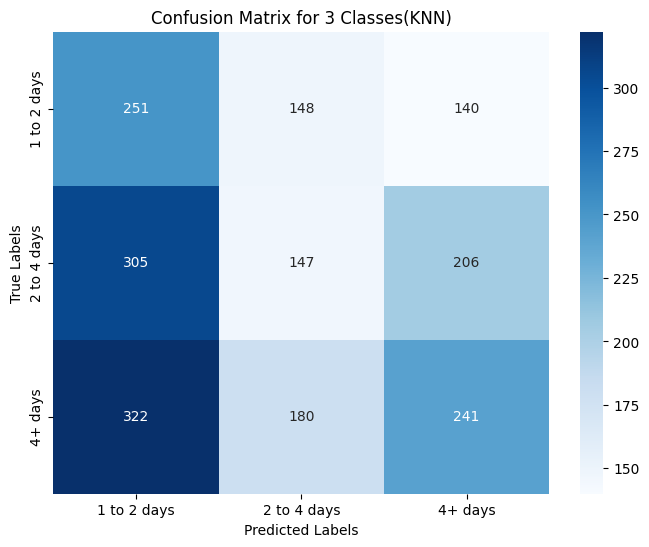

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# 初始化 KNN 模型
knn_model = KNeighborsClassifier()

# 在训练集上拟合模型
knn_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)

# 计算准确率
accuracy_train = accuracy_score(y_train, y_pred_train)
print("训练准确率:", accuracy_train)
print(classification_report(y_train, y_pred_train))

accuracy_test = accuracy_score(y_test, y_pred)
print("测试准确率:", accuracy_test)
print(classification_report(y_test, y_pred))

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)

import seaborn as sns
import matplotlib.pyplot as plt

labels = ['1 to 2 days', '2 to 4 days', '4+ days']

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(KNN)')
plt.show()

模型准确率: 0.41334277864221575
              precision    recall  f1-score   support

 1 to 2 days       0.38      0.28      0.33      2155
 2 to 4 days       0.40      0.50      0.44      2632
     4+ days       0.48      0.46      0.47      2969

    accuracy                           0.42      7756
   macro avg       0.42      0.41      0.41      7756
weighted avg       0.42      0.42      0.42      7756

测试准确率: 0.38917525773195877
              precision    recall  f1-score   support

 1 to 2 days       0.29      0.22      0.25       539
 2 to 4 days       0.37      0.47      0.41       658
     4+ days       0.47      0.44      0.46       743

    accuracy                           0.39      1940
   macro avg       0.38      0.38      0.37      1940
weighted avg       0.39      0.39      0.38      1940

balanced_accuracy: 0.37671467732176184


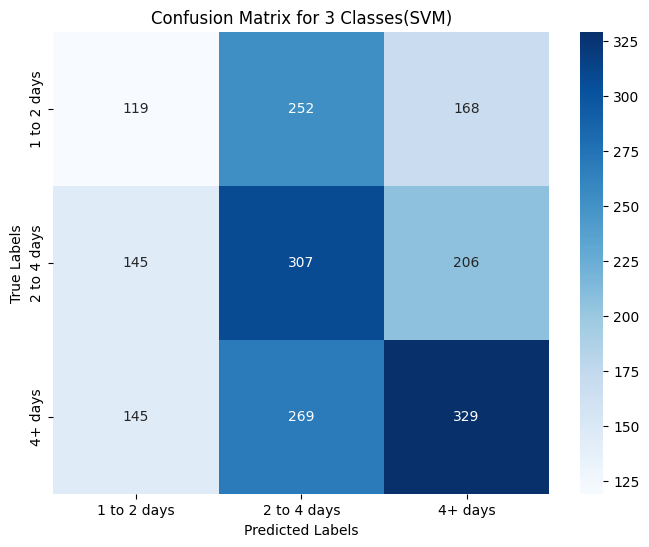

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm_model = SVC(class_weight='balanced')

# 在训练集上拟合模型
svm_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm_model.predict(X_test)
y_pred_train=svm_model.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
print(classification_report(y_train, y_pred_train))
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("测试准确率:", accuracy)
print(classification_report(y_test, y_pred))

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(SVM)')
plt.show()

模型准确率: 0.44106360795890404
              precision    recall  f1-score   support

 1 to 2 days       0.41      0.33      0.36      2155
 2 to 4 days       0.43      0.53      0.47      2632
     4+ days       0.50      0.46      0.48      2969

    accuracy                           0.45      7756
   macro avg       0.45      0.44      0.44      7756
weighted avg       0.45      0.45      0.45      7756

模型准确率: 0.44106360795890404
随机森林模型准确率: 0.36855670103092786
              precision    recall  f1-score   support

 1 to 2 days       0.28      0.23      0.25       539
 2 to 4 days       0.36      0.43      0.39       658
     4+ days       0.44      0.41      0.42       743

    accuracy                           0.37      1940
   macro avg       0.36      0.36      0.36      1940
weighted avg       0.37      0.37      0.37      1940

随机森林模型的balanced accuracy: 0.3583434112976304


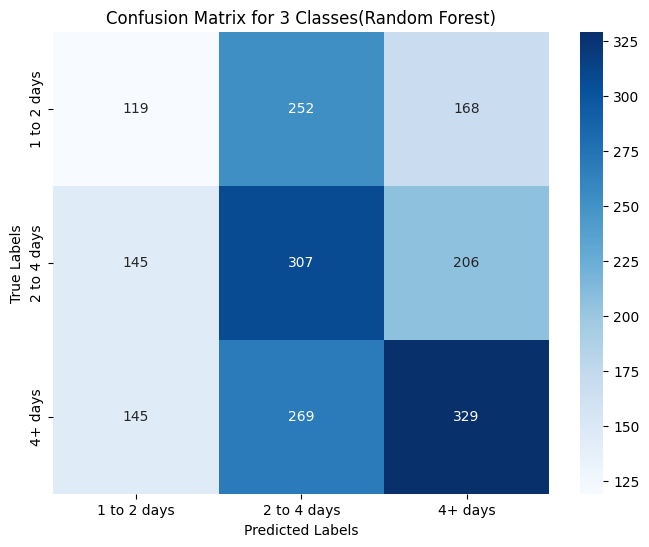

In [88]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型，设置 class_weight 参数为 'balanced'
forest_model = RandomForestClassifier(class_weight='balanced')

# 在训练集上拟合模型
forest_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_forest = forest_model.predict(X_test)
y_pred_train=forest_model.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
print(classification_report(y_train, y_pred_train))

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
# 计算准确率
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("随机森林模型准确率:", accuracy_forest)
print(classification_report(y_test, y_pred_forest))

balanced_accuracy_forest = balanced_accuracy_score(y_test, y_pred_forest)
print("随机森林模型的balanced accuracy:", balanced_accuracy_forest)

conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(Random Forest)')
plt.show()

模型准确率: 0.3867292820932393
              precision    recall  f1-score   support

 1 to 2 days       0.33      0.33      0.33      2155
 2 to 4 days       0.38      0.38      0.38      2632
     4+ days       0.46      0.45      0.45      2969

    accuracy                           0.39      7756
   macro avg       0.39      0.39      0.39      7756
weighted avg       0.39      0.39      0.39      7756

模型准确率: 0.3867292820932393
模型准确率: 0.37216494845360826
              precision    recall  f1-score   support

 1 to 2 days       0.29      0.29      0.29       539
 2 to 4 days       0.35      0.36      0.36       658
     4+ days       0.45      0.45      0.45       743

    accuracy                           0.37      1940
   macro avg       0.36      0.36      0.36      1940
weighted avg       0.37      0.37      0.37      1940

balanced_accuracy: 0.3637959694057744


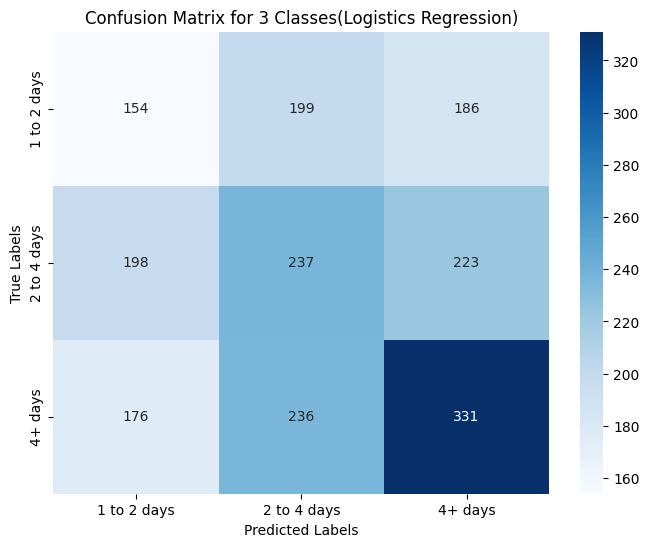

In [89]:
from sklearn.linear_model import LogisticRegression

# 初始化逻辑回归模型，设置 class_weight 参数为 'balanced'
logistic_model = LogisticRegression(class_weight='balanced')

# 在训练集上拟合模型
logistic_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logistic_model.predict(X_test)
y_pred_train=logistic_model.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
print(classification_report(y_train, y_pred_train))

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)
print(classification_report(y_test, y_pred))

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(Logistics Regression)')
plt.show()

模型准确率: 0.441791991874247
              precision    recall  f1-score   support

 1 to 2 days       0.42      0.32      0.36      2155
 2 to 4 days       0.43      0.54      0.48      2632
     4+ days       0.50      0.47      0.48      2969

    accuracy                           0.45      7756
   macro avg       0.45      0.44      0.44      7756
weighted avg       0.45      0.45      0.45      7756

模型准确率: 0.441791991874247
模型准确率: 0.37268041237113403
              precision    recall  f1-score   support

 1 to 2 days       0.29      0.23      0.25       539
 2 to 4 days       0.36      0.43      0.39       658
     4+ days       0.43      0.43      0.43       743

    accuracy                           0.37      1940
   macro avg       0.36      0.36      0.36      1940
weighted avg       0.37      0.37      0.37      1940

balanced_accuracy: 0.36159286965187637
balanced_accuracy: 0.36159286965187637


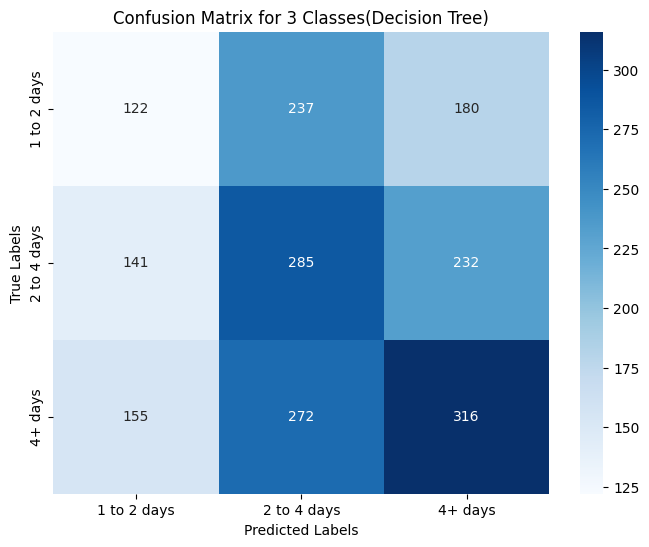

In [90]:
from sklearn.tree import DecisionTreeClassifier

# 初始化决策树模型，设置 class_weight 参数为 'balanced'
tree_model = DecisionTreeClassifier(class_weight='balanced')

# 在训练集上拟合模型
tree_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = tree_model.predict(X_test)
y_pred_train=tree_model.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
print(classification_report(y_train, y_pred_train))

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)
print(classification_report(y_test, y_pred))

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(Decision Tree)')
plt.show()

D:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


模型准确率: 0.441791991874247
              precision    recall  f1-score   support

 1 to 2 days       0.42      0.32      0.36      2155
 2 to 4 days       0.43      0.54      0.48      2632
     4+ days       0.50      0.47      0.48      2969

    accuracy                           0.45      7756
   macro avg       0.45      0.44      0.44      7756
weighted avg       0.45      0.45      0.45      7756

模型准确率: 0.441791991874247
模型准确率: 0.3752577319587629
              precision    recall  f1-score   support

 1 to 2 days       0.29      0.29      0.29       539
 2 to 4 days       0.36      0.37      0.37       658
     4+ days       0.45      0.44      0.45       743

    accuracy                           0.38      1940
   macro avg       0.37      0.37      0.37      1940
weighted avg       0.38      0.38      0.38      1940

balanced_accuracy: 0.3668934370231584


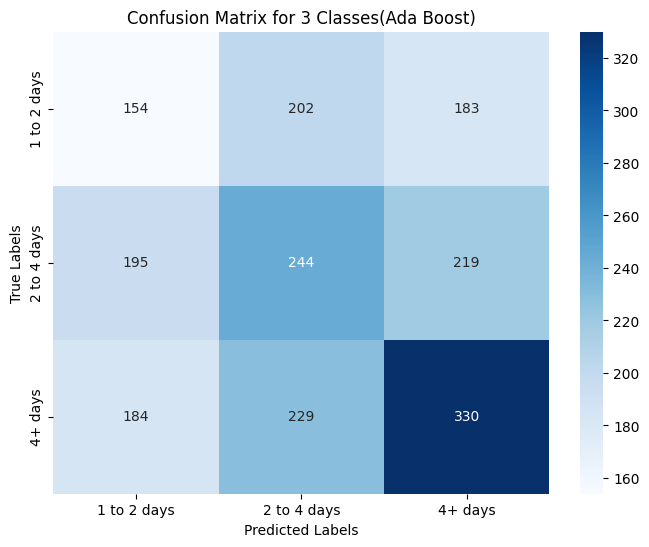

In [91]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# 使用 RandomOverSampler 进行上采样
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# 初始化 Adaboost 分类器
adaboost_model = AdaBoostClassifier(n_estimators=50)

# 在平衡的训练集上拟合模型
adaboost_model.fit(X_train_resampled, y_train_resampled)

# 在测试集上进行预测
y_pred = adaboost_model.predict(X_test)
y_pred_train=tree_model.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
print(classification_report(y_train, y_pred_train))

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
# 计算准确率和打印分类报告
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)
print(classification_report(y_test, y_pred))

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(Ada Boost)')
plt.show()

模型准确率: 0.441791991874247
              precision    recall  f1-score   support

 1 to 2 days       0.42      0.32      0.36      2155
 2 to 4 days       0.43      0.54      0.48      2632
     4+ days       0.50      0.47      0.48      2969

    accuracy                           0.45      7756
   macro avg       0.45      0.44      0.44      7756
weighted avg       0.45      0.45      0.45      7756

模型准确率: 0.441791991874247
模型准确率: 0.37731958762886597
              precision    recall  f1-score   support

 1 to 2 days       0.30      0.29      0.29       539
 2 to 4 days       0.36      0.36      0.36       658
     4+ days       0.45      0.46      0.45       743

    accuracy                           0.38      1940
   macro avg       0.37      0.37      0.37      1940
weighted avg       0.38      0.38      0.38      1940

balanced_accuracy: 0.3681663782605909


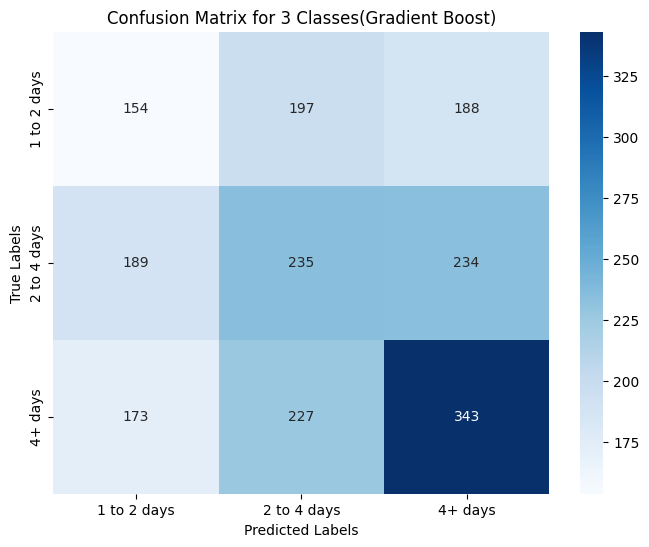

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# 使用 RandomOverSampler 进行上采样
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# 初始化 GradientBoostingClassifier
gradient_boost_model = GradientBoostingClassifier(n_estimators=50)

# 在平衡的训练集上拟合模型
gradient_boost_model.fit(X_train_resampled, y_train_resampled)

# 在测试集上进行预测
y_pred = gradient_boost_model.predict(X_test)
y_pred_train=tree_model.predict(X_train)

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
print(classification_report(y_train, y_pred_train))

accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("模型准确率:", accuracy)
# 计算准确率和打印分类报告
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)
print(classification_report(y_test, y_pred))
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("balanced_accuracy:", balanced_accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3 Classes(Gradient Boost)')
plt.show()